<a href="https://colab.research.google.com/github/amitshakarchy/big-data-analysis/blob/main/The_Art_of_Analyzing_Big_Data_Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Art of Analyzing Big Data- Take Home Exam

ID: 313278889

In [2]:
! pip install turicreate
! pip install plotly_express
! pip install networkx

     |████████████████████████████████| 92.0 MB 19 kB/s 
     |████████████████████████████████| 3.6 MB 51.0 MB/s 
     |████████████████████████████████| 3.5 MB 39.8 MB/s 
     |████████████████████████████████| 86.4 MB 79 kB/s 
     |████████████████████████████████| 322 kB 67.1 MB/s 
     |████████████████████████████████| 18.3 MB 435 kB/s 
     |████████████████████████████████| 449 kB 56.8 MB/s 
     |████████████████████████████████| 3.8 MB 38.9 MB/s 
     |████████████████████████████████| 2.9 MB 49.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=e919d9949efbe1f36ab1597416bf216fbe67bc9f42f579ddd34ad69acffceda2
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=e79ee167872

In [2]:
! pip install pandas --upgrade

     |████████████████████████████████| 11.3 MB 7.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
! pip install plotly --upgrade

In [3]:
! rm -rf ./datasets

from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import turicreate as tc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import glob
%matplotlib inline

drive.mount('/content/drive')

databases_folder = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets"
food_prices_csv = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/wfp_food_prices_zaf.csv"
south_africa_covid_csv = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/WHO-COVID-19-global-data.csv"
political_violence_xls = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/south-africa_political_violence_events_and_fatalities_by_month-year.xlsx"
unemployed_charac_xls = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/Table 4 Characteristics of the unemployed - South Africa.xlsx"
non_economucally_xls = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/Table 5 Characteristics of the not economically active - South Africa.xlsx"
sa_tweets_csv = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/tweets-2022-01-23-news24-timeline.csv"


Mounted at /content/drive


##*Question* #1

In this question, we were asked to find a way to describe the spread of the coronavirus over a specific country, chosen from a list of ~200 countries. My chosen country is **South Africa**. Then, we were asked to show the affect of the 4th/5th COVID wave on three disciplines of our choice (education system, public transportation, health system, employment, etc.) in compare to the 1st/2nd COVID wave.



---

**Part 1- description of COVID spread in South Africa**

I chose to use newspapers publications to show the spread of the last COVID-19 wave in South Africa. Before we will dive in into my solution, let's look at the graph of COVID-19 new cases in South Africa. The source of the data is the [World Health Organization](https://covid19.who.int/), that is tracking new corona virus infections worldwide

In [ ]:
# load COVID-19 data, taken from world Health Organization's website
sa_covid_df = pd.read_csv(south_africa_covid_csv)
sa_covid_df = sa_covid_df[['Date_reported', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']] # Get only needed columns

# plot it and mark the 4 waves
fig2 = px.line(sa_covid_df, x="Date_reported", y='New_cases')
fig2.add_vrect(x0="5/29/2020", x1="8/26/2020", 
              annotation_text="1st wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig2.add_vrect(x0="12/2/2020", x1="2/8/2021", 
              annotation_text="2nd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig2.add_vrect(x0="6/6/2021", x1="9/14/2021", 
              annotation_text="3rd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig2.add_vrect(x0="11/20/2021", x1="1/20/2022", 
              annotation_text="4th wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)

fig2.update_layout(title_text="COVID-19 new cases in South Africa")

As you can see, South Africa had 4 waves. On the recent wave, Omicrion variant was discovered. It has a higher peak but seems to be shorter than its former waves.

Now, we will move on to my solution:

**If I was Rothschild- 🏸🏸🏸** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

As I said, I would like to describe the spread of the last COVID wave in South Africa, using the News media, under the assumption that the press will talk about it as main theme when covid infection rates are high, and will turn to discuss other subjects when the wave will it will be lowered.
My first idea was to use a crawller to search articles that where published in South Africa a bit before, during and after the last wave. then, I figured that crawling might take a lot of resources and time and won't be effective enough. My second option will be using a dedicated API. I would use an news-papers API (such as NewsAPI), to grab all articles in the last few months (October 2020 - untill today) that were published in all of the South African's newspapres. Then, I would split my articlacs by their publish date, for example, to perdiods of 3 days. I would use topic modelling to detetct the main discussed topics, and than use BM25 ranking algorithm to find the similarity of COVID-19 terms (such as corova, virus, vaccine, etc.) and the fetched articles. I Excpect to see that over the time, the popularity (the ranking score) of topics that are semantically related to COVID-19 will increase and decrease, correspondingly to the amount of new infection cases in the graph we saw earlier.

The free API's limitations:
* allows using only one source of data- so I choosed the most popular newspaper in South Africa, instead of all news sources available.
* allows to fetch data only one month back in time- so I dont have enough data to describe the whole wave- only its "tail".

Since I Can't get all articles in the needed period of time or get data from every South African's newspapre, results might not be as I excpected. 

First, let's get all articles from a popular newspaper - [News24](https://www.news24.com/).

In [4]:
import requests
def get_news(query):
  url = ('https://newsapi.org/v2/everything?'
        f'q={query}&'
        f'sources=News24&'
        'from=2021-12-29&'
        'to=2022-01-29&'
        'sortBy=popularity&'
        'language=en&'
        'apiKey=0778fcab895740a6b099638586f8b538')

  response = requests.get(url)#.content.decode('utf-8')
  return response

print(get_news("covid").content.decode('utf-8'))

{"status":"ok","totalResults":652,"articles":[{"source":{"id":"news24","name":"News24"},"author":"Zintle Mahlati","title":"News24.com | Covid-19: Govt mulls dropping curfew as part of changes to lockdown regulations - sources","description":"The government has proposed lifting the curfew as part of its reconsideration of Covid-19 lockdown restrictions.","url":"https://www.news24.com/news24/SouthAfrica/News/covid-19-govt-mulls-dropping-curfew-as-part-of-changes-to-lockdown-regulations-sources-20211230","urlToImage":"https://cdn.24.co.za/files/Cms/General/d/83/358f0640ad4c4c749f504767be19c282.jpg","publishedAt":"2021-12-30T15:05:42Z","content":"<ul><li>The government is considering doing away with the curfew and increasing indoor gatherings to 1 000 as part of changes to lockdown regulations. </li><li>The curfew has been in place since Marc… [+2294 chars]"},{"source":{"id":"news24","name":"News24"},"author":"Nicole McCain","title":"News24.com | Covid-19: Western Cape passes fourth wave p

In [5]:
import re

date_reg_exp = re.compile(r'\d{4}[-/]\d{2}[-/]\d{2}')

titles_df = pd.DataFrame()
# getting all articles in a string article
for q in ["","covid","corona","vaccine", "Omicron","Covid-19", "world", "health", "infection","variant", "sport","covid-19","bank" ]:
  articles = get_news(q).json()["articles"]
  for ar in articles:
    date =date_reg_exp.findall(ar["publishedAt"])[0]
    titles_df = titles_df.append({"title":ar["title"],"publish_date":date, "description":ar["description"], "content":ar["content"]}, ignore_index=True)

titles_sf = tc.SFrame(titles_df)
titles_sf = titles_sf.sort("publish_date")
len(titles_sf)

247

In [6]:
import turicreate as tc
from nltk.corpus import stopwords
from nltk.stem.porter import *
from functools import lru_cache
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import nltk
nltk.download('stopwords')

stop_words_set = set(stopwords.words("english"))
stemmer = PorterStemmer()

#Using cahcing for faster performence
@lru_cache(maxsize=None)
def word_stemming(w):
    return stemmer.stem(w)

def skip_word(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

def text_to_bow(text):
    text = text.lower()
    l = [word_stemming(w) for w in word_tokenize(text) if not skip_word(w) ]
    l = [w for w in l if not skip_word(w)]
    d = Counter(l)
    return dict(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Split the data into time periods of 3 days each, build a topic model and calculate BM25 score for each time period

In [17]:
import nltk
nltk.download('punkt')

n_splits = len(titles_sf["publish_date"].unique())//3
sf_list = []
bm25 = pd.DataFrame()
each_len = len(titles_sf) // n_splits
for i in range(n_splits):
  sf = titles_sf[i * each_len : i * each_len + each_len]
  # get topics
  docs = tc.text_analytics.count_ngrams(sf['content'], n=2, method="word")

  bow_list = []
  for t in sf['content']:
      bow_list.append(text_to_bow(t))
  sf['bow'] = bow_list
  dd = tc.text_analytics.bm25(sf['bow'], ['virus','covid', 'sars','COVID-19','vaccine','corona', 'sars','Coronavirus ', 'virus', 'omicron','quarantine','wave']).sort('bm25', ascending=False)
  dd["time"] = i
  bm25 = pd.concat([bm25,dd.to_dataframe()])

  _docs = docs.dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
  topic_model = tc.topic_model.create(_docs, num_topics=30)
  sf_list.append(topic_model.topics)

topic_sframe = tc.SFrame()
for i in range(len(sf_list)):
  sf_list[i]["time"] = i
  topic_sframe.append(sf_list[i])
  topic_sframe = topic_sframe.append(sf_list[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Learning a topic model

Number of documents        24

Vocabulary size       386

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 9.179ms       | 1.58949e+06    | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       376

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 50.088ms      | 163323         | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       383

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 37.766ms      | 1.02861e+06    | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       459

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 25.612ms      | 1.3626e+06     | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       380

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 19.957ms      | 1.05693e+06    | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       422

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 21.096ms      | 1.47487e+06    | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       271

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 18.959ms      | 964455         | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       499

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 21.011ms      | 391824         | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       530

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 22.672ms      | 705734         | 0               |

+-----------+---------------+----------------+-----------------+

Learning a topic model

Number of documents        24

Vocabulary size       472

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 21.926ms      | 112903         | 0               |

+-----------+---------------+----------------+-----------------+

Let's see the different topics discussed at each time period.

In [ ]:
import imageio
from wordcloud import WordCloud
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_set = set(stopwords.words("english"))


def plot_word_cloud(time, topic_words):
    # Data for plotting
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words_set,
                min_font_size = 10).generate(" ".join(topic_words["vocabulary"]))


    fig, ax = plt.subplots(figsize=(8,8), facecolor = None)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set(title=f'Topics - time period {time}')

    # IMPORTANT ANIMATION CODE HERE

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

times = topic_sframe["time"].unique()
imageio.mimsave('./w_clouds_covid_.gif', [plot_word_cloud(time, topic_sframe[topic_sframe["time"]==time]) for time in times.sort()], fps=0.5)

As we can see, there are almost no COVID-19 related topics in here! 😞 That is because data was taken from the end of the 4th COVID wave (the tail of the 4th wave in the graph we saw earlier), and we have an extremly small amount of data- only one resource, and only one month to the past.

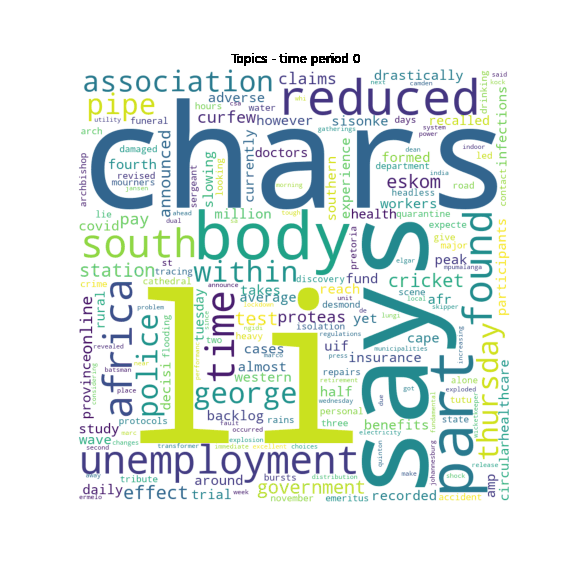

Now, let's plot the ranking results of the last month's articles. If we had enough data, I would expect the bar-plot distribution to look similar to the recent covid wave.
Here, we can only see the "tail" of the wave. 

y-axis: is the BM25 ranking score.
x-axis: the last month (29.12.2021-29.01.2022), devided into 8 time periods of 3 days each.  

In [20]:
bm25.index = [i for i in range(len(bm25))]
px.bar(bm25 ,x=bm25.index, y="bm25", color="time")

After (trying) to display the spread of COVID-19 using news papaers and topic models,  Let's move on to the second part of the question 💪

---


###**Part 2- comparison of the 4th wave to the 1st and 2nd waves**

In this section, I had to choose 3 deceplines for comparison between the 1st and the 2nd COVID wave with the 4th one. Finding datasets was discovered as a pretty tough task, since most of the available data sources requires payment, or not updated to the last months. I tried my best, and managed to find the following datasets:

⚡ Economy & welfare: [food prices in South Africa](https://data.humdata.org/dataset/wfp-food-prices-for-south-africa)- the dataset contains food prices data, sourced from the World Food Programme Price Database. The World Food Programme Price Database covers foods such as maize, rice, beans, fish, and sugar. The graph below shed light on the change in prices of the most basic foods in South Africa, therefor represents the changes in the welfare of the standart houshold.

⚡ Policits & Law Enforcement: [South Africa Conflict Data](https://data.humdata.org/dataset/south-africa-acled-conflict-data)- the dataset provids the total number of reported political violence events and fatalities in South Africa, by month. Political violence events include violence against civilians and explosions/remote violence event types, as well as the mob violence sub-event type of the riots event type.

⚡ Employment: [the latest formal employment dataset](http://www.statssa.gov.za/?page_id=1854&PPN=P0211&SCH=72945)- holds the number (in thousends) of unemployed citizens over time. The data was last updated in September 2021, hence dosen't reveal information about the last 2 COVID waves. I didn't find any other free datase unfortunally 😫



**If I was Rothschild- 🏸🏸🏸** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

As you can see, the main resource that is not available for this task is data. "if I was Rotchild" I was buying data to perform the needed analysis and show how the last wave affected education/transportation/health... in compare to the former waves. Another "crazy" option, is using GPS data from citizents' smartphons. By showing that most cellolar phones are placed in living areas during the day instead of placed in workplace areas (factories, farms, mining sites etc.)- I might be able to show the unemployment rate changes due to the covid's waves. It may work in South Africa since it is characterised by unqualified employees that must work on-site (especially in mining) and cannot work from home.

Load and prepare the datasets:

In [ ]:
food_prices_df = pd.read_csv(food_prices_csv)
food_prices_df = food_prices_df.iloc[1: , :] # drop first raw, since it contains unessecery information
food_prices_df = food_prices_df[['date', 'commodity', 'pricetype', 'usdprice']] # Get only needed columns

# extract month and year from date
food_prices_df["year"] = food_prices_df["date"].apply(lambda x: x.split('/')[2]).astype(int)
food_prices_df["month"] = food_prices_df["date"].apply(lambda x: x.split('/')[1]).astype(int)
food_prices_df["day"] = food_prices_df["date"].apply(lambda x: x.split('/')[0]).astype(int)
food_prices_df = food_prices_df[food_prices_df["year"]>2018]
food_prices_df.head(5)

date       commodity  pricetype usdprice  year  month  day
685  1/15/2019   Maize (white)  Wholesale    0.217  2019     15    1
686  1/15/2019  Maize (yellow)  Wholesale   0.1986  2019     15    1
687  1/15/2019           Wheat  Wholesale    0.322  2019     15    1
688  2/15/2019   Maize (white)  Wholesale   0.1938  2019     15    2
689  2/15/2019  Maize (yellow)  Wholesale   0.1845  2019     15    2

In [ ]:
political_violence_df = pd.read_excel(political_violence_xls)
political_violence_df["Month"] = pd.to_datetime(political_violence_df["Month"], format='%B').dt.month.astype(str)
political_violence_df["Date"] = political_violence_df["Month"] + "/" + political_violence_df["Year"].astype(str) 
political_violence_df = political_violence_df[political_violence_df["Year"]>2018]
political_violence_df.head(5)

Country  Year Month  Events  Fatalities    Date
264  South Africa  2019     1      18          19  1/2019
265  South Africa  2019     2      12          14  2/2019
266  South Africa  2019     3      17           7  3/2019
267  South Africa  2019     4      11           5  4/2019
268  South Africa  2019     5       7           6  5/2019

In [ ]:
unemployed_charac_df = pd.read_excel(unemployed_charac_xls)
unemployed_charac_df = unemployed_charac_df.T
unemployed_charac_df["Date"] = unemployed_charac_df.index
unemployed_charac_df["Short-term unemployment (less than 1 year)"] = unemployed_charac_df[2]
unemployed_charac_df["Long-term unemployment (1 year and more)"] = unemployed_charac_df[1]
unemployed_charac_df["year"] = unemployed_charac_df["Date"].apply(lambda x: x.split(" ")[1]).astype(int)
unemployed_charac_df = unemployed_charac_df[unemployed_charac_df["year"]>2018]
unemployed_charac_df = unemployed_charac_df.iloc[1: , :] # drop first raw, since it contains unessecery information
unemployed_charac_df = unemployed_charac_df[["Date", "Short-term unemployment (less than 1 year)", "Long-term unemployment (1 year and more)"]]
unemployed_charac_df.head(5)

Date  ... Long-term unemployment (1 year and more)
Apr-Jun 2019  Apr-Jun 2019  ...                                  4757.44
Jul-Sep 2019  Jul-Sep 2019  ...                                  4772.82
Oct-Dec 2019  Oct-Dec 2019  ...                                  4931.32
Jan-Mar 2020  Jan-Mar 2020  ...                                  5070.69
Apr-Jun 2020  Apr-Jun 2020  ...                                  2877.83

[5 rows x 3 columns]

In [ ]:
import plotly.express as px
import seaborn as sns

fig1 = px.line(food_prices_df, x="date", y='usdprice', color='commodity')
fig1.add_vrect(x0="6/15/2020", x1="8/15/2020", 
              annotation_text="1st wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig1.add_vrect(x0="12/15/2020", x1="2/15/2021", 
              annotation_text="2nd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig1.add_vrect(x0="6/15/2021", x1="9/15/2021", 
              annotation_text="3rd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig1.add_vrect(x0="11/15/2021", x1="12/15/2021", 
              annotation_text="4th wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)

fig1.update_layout(title_text="Prices of Maize and wheat (in dollars) in South Africa")
fig1.show()

The graph shows the price (in USD dollars) of basic food in South Africa, over time. COVID-19 waves are marked in green. The most popular food in South Africa is the maize. It serves as animal food, and as the main source of calories for many households. While the first 2 COVID waves seems to have no affect on the prices icreasement, the recent two waves, hitted harder on South Africa and might affected temporarily on the prices of the yellow maze. 

In [ ]:
fig3 = px.line(political_violence_df, x="Date", y='Events')
fig3.add_vrect(x0="6/2020", x1="8/2020", 
              annotation_text="1st wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig3.add_vrect(x0="12/2020", x1="2/2021", 
              annotation_text="2nd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig3.add_vrect(x0="6/2021", x1="9/2021", 
              annotation_text="3rd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig3.add_vrect(x0="11/2021", x1="1/2022", 
              annotation_text="4th wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)

fig3.update_layout(title_text="Political Violance Events in South Africa")


The graph shows the number of political violence events over time (in months). COVID-19 waves are marked in green. As can be seen, the 4th wave shows a sharp decline in the amount of violence events, in compare to the first 2 waves. Wave #2 has a sharp increase in the amount of events. That behavior may reflects the citizens anger during the 2nd wave, and the fact that many people probably stayed at home during the 4th wave (the Omicron varient).

In [ ]:
fig4 = px.line(unemployed_charac_df, x="Date", y='Long-term unemployment (1 year and more)')
fig4.add_vrect(x0="Apr-Jun 2020", x1="Jul-Sep 2020", 
              annotation_text="1st wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)
fig4.add_vrect(x0="Oct-Dec 2020", x1="Jan-Mar 2021", 
              annotation_text="2nd wave", annotation_position="top left", annotation=dict(font_size=15), fillcolor="green", opacity=0.25, line_width=0)

fig4.update_layout(title_text="Long-term unempluyment citizens in South Africa")

The graph shows the number (in thousends) of citizens that are unemployed for 1 year or more than that. We can easily see the high slope, that reflect the increasement of unemployed citizens over the pandemic. The lack of data wont enable us to compare the recent waves to the first ones. [This site](https://tradingeconomics.com/south-africa/unemployment-rate) shows us the unemplyment rate over time in South Africa- right now, it is considered the highest rate in the world!! 😧, showing us that South Africa was compromised severly during the last COVID waves (especially from the Omicron varient). Again, I couldn't find free data so I couldn't compare the impact of the COVID waves on the South African socity properly.

##Question #2

###Part 1

###Build the network
In this question, we were told to use [Kaggle Meta](https://www.kaggle.com/kaggle/meta-kaggle) dataset to build the social network of the users, based on the Team Membership data. Let's start by downloading the data from kaggle, and loading it into SFrame.

**If I was Rothschild- 🏸🏸🏸** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

First of all, if I had unlimited time and space, I would use all of the data I have, to eventually have large and detailed communitites. You will see that I'll be using only a part of the data to build the network due to limited sources.

In [110]:
#setting up Kaggle
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"aamitshakarchy","key":"58502e08e5c784b7d74c285da6f0a66f"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [111]:
!mkdir ./datasets
!mkdir ./datasets/meta_kaggle

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/meta-kaggle -p ./datasets/meta_kaggle

!unzip ./datasets/meta_kaggle/*.zip  -d ./datasets/meta_kaggle/

In [1]:
import turicreate as tc

team_membership_csv = "/content/datasets/meta_kaggle/TeamMemberships.csv"
sf_team_membership = tc.SFrame.read_csv(team_membership_csv)
sf_team_membership

Finished parsing file /content/datasets/meta_kaggle/TeamMemberships.csv

Parsing completed. Parsed 100 lines in 3.04505 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 1243254 lines. Lines per second: 471767

Finished parsing file /content/datasets/meta_kaggle/TeamMemberships.csv

Parsing completed. Parsed 4980215 lines in 5.35787 secs.

Columns:
	Id	int
	TeamId	int
	UserId	int
	RequestDate	str

Rows: 4980215

Data:
+-------+--------+--------+-------------+
|   Id  | TeamId | UserId | RequestDate |
+-------+--------+--------+-------------+
| 16458 |  518   |  635   |             |
| 16464 |  526   |  839   |             |
| 16465 |  527   |  816   |             |
| 16466 |  528   |  778   |             |
| 16467 |  529   |  747   |             |
| 16468 |  531   |  842   |             |
| 16469 |  532   |  820   |             |
| 16470 |  532   |  879   |             |
| 16471 |  533   |  819   |             |
| 16472 |  533   |  821   |             |
+-------+--------+--------+-------------+
[4980215 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

As you can see, this network is going to be extreamly big since we have 4,976,734  rows in our dataset. The Exam's guidlines suggested to reduce the size of the network, by taking off non-central users. Let's see the distribution of our users- to how many teams each user us related.

Let's take a look at the amount of teams each user is related with.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


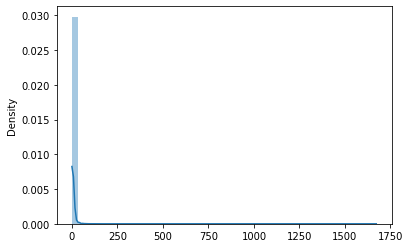

In [2]:
import turicreate.aggregate as agg
import seaborn as sns

grouped_by_uid = sf_team_membership.groupby("UserId", {"count":agg.COUNT()})
sns.distplot(list(grouped_by_uid["count"]))

Most of users are connected to a small amount of teams. Since I don't have enough memory on Google colab, I will cut them out and consider only users that are related to at least 2 teams

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Columns:
	Id	int
	TeamId	int
	UserId	int
	RequestDate	str
	count	int

Rows: 3971231

Data:
+-------+--------+--------+-------------+-------+
|   Id  | TeamId | UserId | RequestDate | count |
+-------+--------+--------+-------------+-------+
| 16466 |  528   |  778   |             |   5   |
| 16467 |  529   |  747   |             |   7   |
| 16468 |  531   |  842   |             |   2   |
| 16471 |  533   |  819   |             |   7   |
| 16473 |  534   |  674   |             |   9   |
| 16478 |  539   |  840   |             |   2   |
| 16483 |  544   |  887   |             |   5   |
| 16484 |  547   |  583   |             |   3   |
| 16485 |  548   |  701   |             |   7   |
| 16487 |  550   |  835   |             |   20  |
+-------+--------+--------+-------------+-------+
[3971231 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

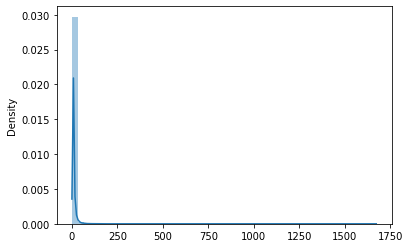

In [3]:
grouped_by_uid = grouped_by_uid[grouped_by_uid["count"]>1]
sns.distplot(list(grouped_by_uid["count"]))
sf_team_membership = sf_team_membership.join(grouped_by_uid, how='inner')
sf_team_membership

The size of the network will be reduces dramatically, since we have now only 3,971,231 records in our dataset.

Both IDs of users and teams have the same serial numbers. To avoid overriding of nodes in my network, I will change the serial numbers of the teams' ID

In [4]:
sf_team_membership["UserId"].min(), sf_team_membership["UserId"].max()

(368, 9505032)

In [5]:
sf_team_membership["TeamId"].min(), sf_team_membership["TeamId"].max()

(497, 8065249)

In [6]:
sf_team_membership["NewTeamId"] = sf_team_membership["TeamId"] + sf_team_membership["UserId"].max()
sf_team_membership

Columns:
	Id	int
	TeamId	int
	UserId	int
	RequestDate	str
	count	int
	NewTeamId	int

Rows: 3971231

Data:
+-------+--------+--------+-------------+-------+-----------+
|   Id  | TeamId | UserId | RequestDate | count | NewTeamId |
+-------+--------+--------+-------------+-------+-----------+
| 16466 |  528   |  778   |             |   5   |  9505560  |
| 16467 |  529   |  747   |             |   7   |  9505561  |
| 16468 |  531   |  842   |             |   2   |  9505563  |
| 16471 |  533   |  819   |             |   7   |  9505565  |
| 16473 |  534   |  674   |             |   9   |  9505566  |
| 16478 |  539   |  840   |             |   2   |  9505571  |
| 16483 |  544   |  887   |             |   5   |  9505576  |
| 16484 |  547   |  583   |             |   3   |  9505579  |
| 16485 |  548   |  701   |             |   7   |  9505580  |
| 16487 |  550   |  835   |             |   20  |  9505582  |
+-------+--------+--------+-------------+-------+-----------+
[3971231 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


Let's build the network:

In [11]:
import networkx as nx

g = nx.Graph() # Creating Undirected Graph

for team_id in sf_team_membership['NewTeamId'].unique():
  g.add_node(team_id, type='team')

for user_id in sf_team_membership['UserId'].unique():
  g.add_node(user_id, type='user')

for row in sf_team_membership:
  g.add_edge(row["NewTeamId"], row["UserId"])

nx.info(g)

'Graph with 4641887 nodes and 3971231 edges'

Find the most central entities in my network, and then take the 70% of the most central entities. I'm doing so in order to reduce the size of my network, before I'll use a community algorthm

In [12]:
import operator
d = nx.pagerank(g)
most_central = sorted(dict(d).items(), key=operator.itemgetter(1), reverse=True)[:int(len(sf_team_membership)*0.80)]
lst_ids = [id for id, score in most_central]
sub_g = nx.subgraph(g, lst_ids)
del(g)
nx.info(sub_g)

'Graph with 1588492 nodes and 881894 edges'

###Find Central Communities
Now, I will separate the neywork into communities, i.e., disjoint subgraphs. 

**If I was Rothschild- 🏸🏸🏸** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

I will use Clauset-Newman-Moore greedy modularity maximization to separate the graph into communities:

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
cc = greedy_modularity_communities(sub_g) # this can take some time
len(cc)

709708

Using the community detection algorithm, we detected 709,708 communities of different sizes. Let's view the size of the distribution of the community sizes:



(array([7.09707e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000e+00, 2.33210e+03, 4.66320e+03, 6.99430e+03, 9.32540e+03,
        1.16565e+04, 1.39876e+04, 1.63187e+04, 1.86498e+04, 2.09809e+04,
        2.33120e+04]),
 <a list of 10 Patch objects>)

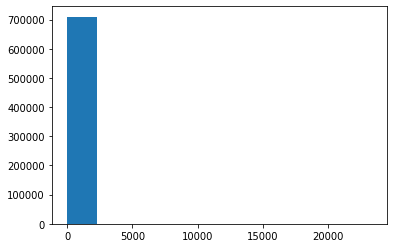

In [ ]:
import matplotlib.pyplot as plt
community_size_list = [len(c) for c in cc]
plt.hist(community_size_list)

We can see that most communities are relatively small. **We can say that the largest communities are the central once**, but since we can't draw such large communities- Let's find a community that is larger than 500 but smaller than 600:


In [ ]:
selected_community_list = [c for c in cc if 1000 > len(c) > 500]
len(selected_community_list)

2

Now let's draw one of the communities:

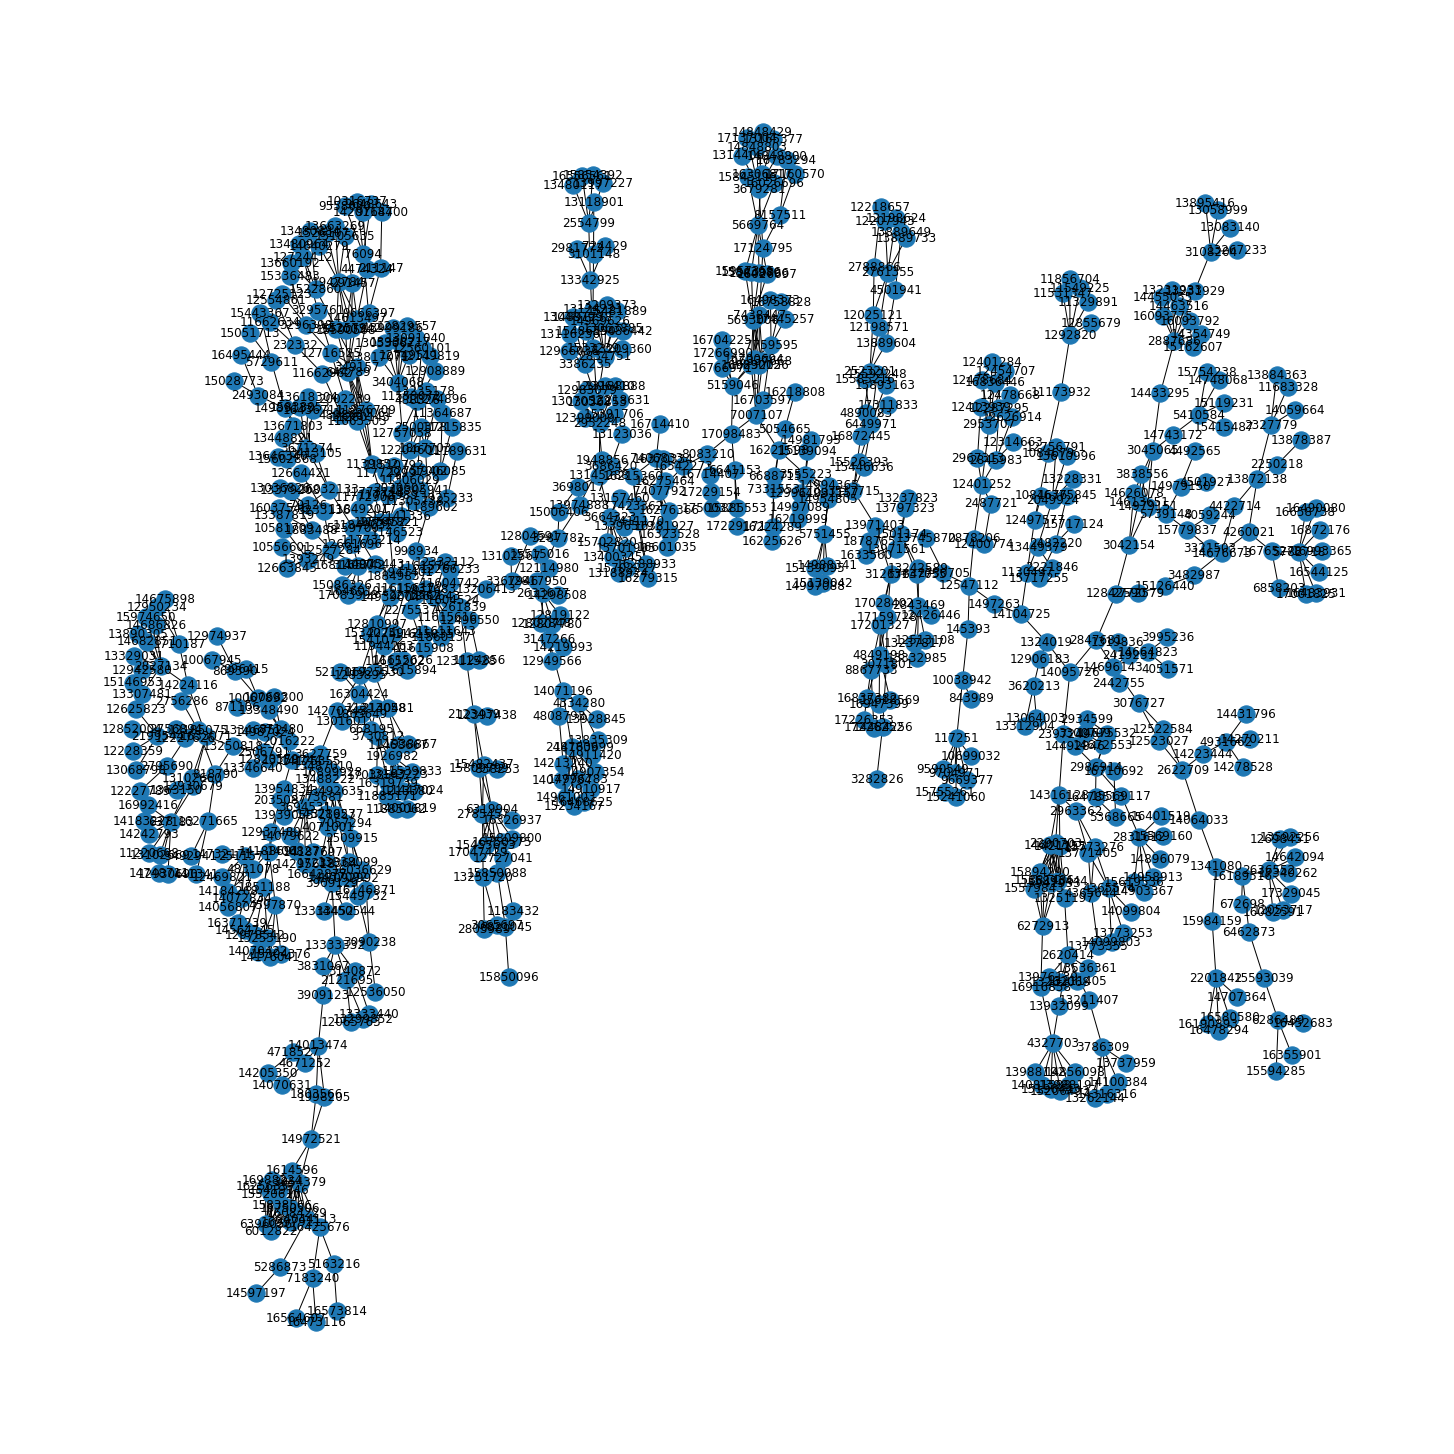

In [ ]:
plt.figure(figsize=(20,20))
c1 = sub_g.subgraph(selected_community_list[0])
nx.draw_kamada_kawai(c1, with_labels=True)

I'll upload an image shows nodes of users (pink) and teams (green) usin Cytoscape, of another community

In [ ]:
nx.write_gml(c1, "My_community.gml")

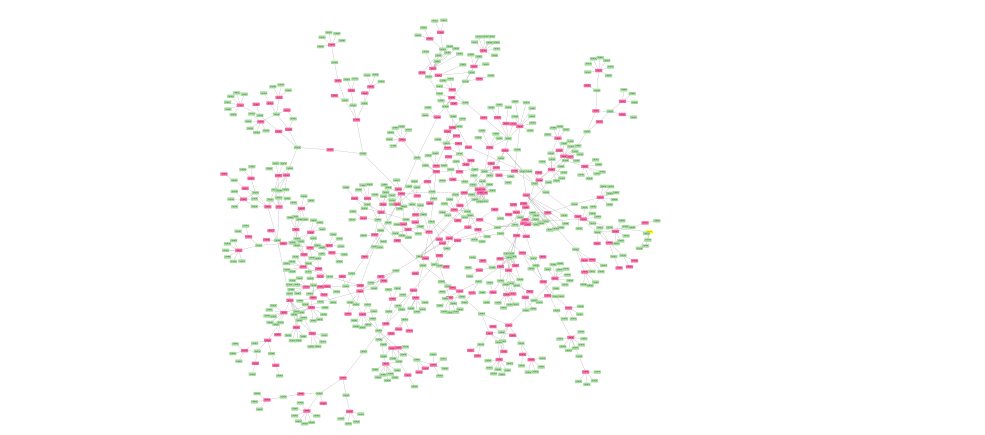

###Find Groups that Compete Togheret
Now, let's move forward to find groups of at least 3 users, competting togheter in at least 10 competitions.

**If I was Rothschild- 🏸🏸🏸** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

I found 3 groups that match the criteria. If I was using all the given data, I would find more.

In [ ]:
def get_users_compete_at_least_n(n_competitions, g):
  """Returns a list of users that participated in at least n competitions"""
  users_competed_more_than_n = []
  for nid in g.nodes:
    if g.nodes[nid]["type"] == "user":
      user_connected_teams = list(g[nid].keys())
      if len(user_connected_teams) > n_competitions:
        users_competed_more_than_n.append(nid)
  return users_competed_more_than_n

def get_teams_user_dict(g, uid_list):
  """Returns a dictionary of teams and the teams' users"""
  teams_users = {}
  for uid in uid_list:
    user_connected_teams = list(g[uid].keys())
    for tid in user_connected_teams:
      connected_users = teams_users.setdefault(tid, [])
      connected_users.append(uid)
      teams_users.update({tid:connected_users})
  return teams_users

In [ ]:
n_competitions = 10
n_users_per_team = 3
users_competed_more_than_n = get_users_compete_at_least_n(n_competitions, sub_g)
teams_users = get_teams_user_dict(sub_g, users_competed_more_than_n)

teams_users_more_than_3 = {}
for team in teams_users:
  if len(teams_users[team])>= n_users_per_team:
    teams_users_more_than_3[team] = teams_users[team]

In [ ]:
groups = []
for t1 in teams_users_more_than_3:
  shared_teams = 0
  for t2 in teams_users_more_than_3:
    if t1 != t2:
      if teams_users_more_than_3[t1] == teams_users_more_than_3[t2]:
        shared_teams += 1
  if shared_teams > n_competitions:
    if teams_users_more_than_3[t1] not in groups:
      groups.append(teams_users_more_than_3[t1])
      print(teams_users_more_than_3[t1])

[4662098, 4662375, 4471048, 4648702]
[4661121, 4661041, 4660995, 4660978]
[3077080, 4661010, 4661162, 4661191]


We found 3 groups that match the requirements. Remember- I didn't use all of the data in the network! 
Let's draw one of the groups using Cytoscape. Again- pink represents user nodes, green represents team nodes.

In [ ]:
group_list = set(groups[0])
for uid in groups[0]:
  group_list.update(list(sub_g[uid].keys()))
nx.write_gml(group1, "My_comp.gml")

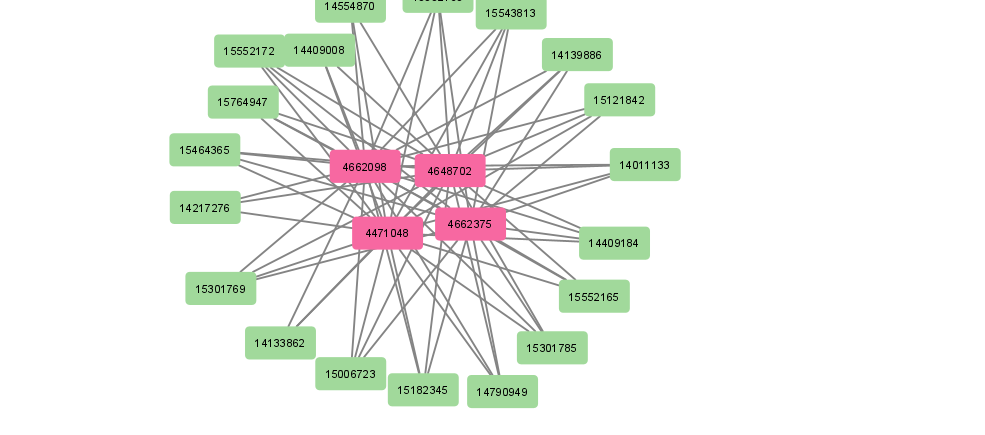



---



###Part 2


###Find which topics were discussed, and how they altered over the years.

Using forums posts data, I found the topics for each year. I did it by building a topic model for each year, and then displayed it on a worldcloud.

**If I was Rothschild- 🧐** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 
Since data is too big for working on colab, I had to use only a very small portion (20%) of it. If I had the resources, I would use all data and have a more qccurate knowledge of the topics.


In [2]:
import turicreate as tc
import pandas as pd

ForumMessages_csv = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/ForumMessages.csv"
df = pd.read_csv(ForumMessages_csv, encoding='ISO-8859-1')
df = df[["ForumTopicId","PostDate","Message"]]
df = df.dropna(subset=['Message'])
df["Message"] = df["Message"].astype(str)

forum_messages_sf = tc.SFrame(df)
forum_messages_sf["message_length"] = forum_messages_sf["Message"].apply(lambda x: len(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Take only messages that are longer then 2 characters

In [3]:
forum_messages_sf = forum_messages_sf[forum_messages_sf["message_length"] > 2]
forum_messages_sf, len(forum_messages_sf)

(Columns:
 	ForumTopicId	int
 	PostDate	str
 	Message	str
 	message_length	int
 
 Rows: 1416843
 
 Data:
 +--------------+---------------------+-------------------------------+----------------+
 | ForumTopicId |       PostDate      |            Message            | message_length |
 +--------------+---------------------+-------------------------------+----------------+
 |      16      | 05/12/2010 04:39:30 | Here are some papers that ... |      1584      |
 |      16      | 05/12/2010 04:39:30 | More research... enjoy<br>... |      1838      |
 |     216      | 12/01/2010 21:46:53 | Is there a time order betw... |      185       |
 |     163      | 10/24/2010 23:38:59 | Hi all,<br><br>Just to let... |      244       |
 |     163      | 10/24/2010 23:38:59 | Hmmm...<div><br></div><div... |      781       |
 |     163      | 10/24/2010 23:38:59 | Apologies, I hadn't antipi... |      721       |
 |     163      | 10/24/2010 23:38:59 | Anthony, thank you for und... |      902       |
 |   

Due to lack of RAM, sample a portion of the data

In [4]:
forum_messages_sf = forum_messages_sf.sample(0.2)

clean the data of script sintax, since it is not part of the text itself and is a by-product of the parsing

In [5]:
import re
def process(text):
  text = text.replace("\\","")

  text = re.sub(r"<span[^>]*>", "", text)
  text = re.sub(r"</span[^>]*>", "", text)
  
  text = re.sub(r"<br[^>]*>", "", text)
  text = re.sub(r"</br[^>]*>", "", text)
  text = re.sub(r"<BR[^>]*>", "", text)
  text = re.sub(r"</BR[^>]*>", "", text)

  text = re.sub(r"<P[^>]*>", "", text)
  text = re.sub(r"</P[^>]*>", "", text)
  text = re.sub(r"<p[^>]*>", "", text)
  text = re.sub(r"</p[^>]*>", "", text)

  text = re.sub(r"<div[^>]*>", "", text)
  text = re.sub(r"</div[^>]*>", "", text)

  text = re.sub(r"<STRONG[^>]*>", "", text)
  text = re.sub(r"</STRONG[^>]*>", "", text)

  text = re.sub(r"\\r", "", text)
  text = re.sub(r"\\n", "", text)

  text = re.sub(r"\d{7}[^:]\d{2}", "", text)

  text = text.replace("\t","")
  text = text.replace("&nbsp;","")

  return text

forum_messages_sf["Message"] = forum_messages_sf["Message"].apply(lambda m: process(m))
# forum_messages_sf["Message_new"] = forum_messages_sf["Message"].apply(lambda m: re.sub(r"\r", "", m))
# forum_messages_sf["Message_new"] = forum_messages_sf["Message"].apply(lambda m: m.replace("\'","'"))
forum_messages_sf[:7]["Message"]

dtype: str
Rows: 7
['Is there a time order between the training and test data?<br><br>In other words, were the links in the test data formed after the links in the training data?<br><br mce_bogus="1">', "Hi all,<br><br>Just to let you know that we have extended the deadline for this competition by just over a week. Both Jeff and I will be travellng around mid November, so wouldn't be able to deal with the competition's conclusion.<br><br>Anhony", "Anthony, thank you for understanding.<div><br></div><div>My suggestion would be to leave the deadline as it was (15th of November) and simply wrap up the contest three days later if you are available on that date.</div><div><br></div><div>I'm curious, why do you believe that changing back the deadline would lessen publicity? Quite the contrary, I'd guess, since Chessbase &amp; co. all reported on the deadline being the 15th which is what at least some people who follow these blogs will be looking for. I don't think that delaying the posting o

In [17]:
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt') # need to download punkt package from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Create documents with bag of words

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import *
from functools import lru_cache
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk


stop_words_set = set(stopwords.words("english"))
stemmer = PorterStemmer()

#Using caching for faster performence
@lru_cache(maxsize=None)
def word_stemming(w):
    return stemmer.stem(w)

def skip_word(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

def text_to_bow(text):
    text = text.lower()
    l = [word_stemming(w) for w in word_tokenize(text) if not skip_word(w) ]
    l = [w for w in l if not skip_word(w)]
    d = Counter(l)
    return dict(d)

In [ ]:
import tqdm 

def create_docs(messages_sf):
  bow_list = []
  for t in tqdm.tqdm(messages_sf['Message']):
      bow_list.append(text_to_bow(t))
  messages_sf['full_bow'] = bow_list

  messages_sf.materialize()
  docs = messages_sf['full_bow']
  return docs

In [ ]:
docs = create_docs(forum_messages_sf)
docs[:2]

100%|██████████| 283382/283382 [04:06<00:00, 1151.47it/s]


dtype: dict
Rows: 2
[{'hi': 1, 'anhoni': 1}, {'apolog': 1, "n't": 1, 'antip': 1, 'might': 2, 'unpopular': 1, 'move': 1, 'canvass': 1, 'opinion': 1, 'first': 1, 'also': 1, 'disapprov': 1, 'chang': 1, 'back': 1, 'deadlin': 2, 'kaggl': 1, 'dictatorship': 1, '.a': 1, 'compromis': 1, 'extend': 1, 'previou': 1, 'three': 1, 'day': 1, 'wednesday': 1, 'novemb': 1, 'jeff': 1, 'offlin': 1, 'avail': 1, 'thought': 1, 'br': 1, 'mce_bogus=': 1, "''": 2}]

Build a topic model to find the discussed topics 

In [ ]:
topic_model = tc.topic_model.create(docs, num_topics=100)
topic_model.get_topics().print_rows(30)

Learning a topic model

Number of documents    283382

Vocabulary size    248631

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 10.38s        | 2.35749e+06    | 0               |

+-----------+---------------+----------------+-----------------+

+-------+----------+----------------------+
| topic |   word   |        score         |
+-------+----------+----------------------+
|   0   |   imag   | 0.07259285037172544  |
|   0   |   use    | 0.020628179822741188 |
|   0   |   time   | 0.01767378801964233  |
|   0   |  first   | 0.010188120444919447 |
|   0   |   crop   | 0.009173114672075667 |
|   1   |   step   | 0.07037156350015888  |
|   1   | gradient | 0.03523261844537353  |
|   1   |   get    | 0.020610430646243086 |
|   1   |  train   | 0.01151725760865884  |
|   1   |   work   | 0.008135876680109925 |
|   2   |   use    | 0.016464990694456876 |
|   2   |   imag   | 0.014429763167329947 |
|   2   |   year   | 0.01431669497137845  |
|   2   |   work   | 0.013344308486195583 |
|   2   |  could   | 0.011761353742874636 |
|   3   |   like   | 0.013092767416431238 |
|   3   |  number  | 0.012557037740967943 |
|   3   |   mean   | 0.010903263525407336 |
|   3   |   row    | 0.010786800552480531 |
|   3   | cluster  | 0.009994852

In [ ]:
topic_model.topics

Columns:
	topic_probabilities	array
	vocabulary	str

Rows: 248631

Data:
+-------------------------------+------------+
|      topic_probabilities      | vocabulary |
+-------------------------------+------------+
| [1.8125103086496081e-06, 0... |     hi     |
| [1.8125103086496081e-06, 2... |   anhoni   |
| [1.8125103086496081e-06, 2... |   apolog   |
| [5.618781956813785e-05, 2.... |    n't     |
| [1.8125103086496081e-06, 2... |   antip    |
| [7.431292265463392e-05, 2.... |   might    |
| [1.8125103086496081e-06, 2... | unpopular  |
| [1.8125103086496081e-06, 2... |    move    |
| [1.8125103086496081e-06, 2... |  canvass   |
| [5.618781956813785e-05, 2.... |  opinion   |
+-------------------------------+------------+
[248631 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
import operator
topics_sf = topic_model.topics

def get_topic_best_match_words(topic_sf, topic_num,n):
  """Returns a topic's bast match words """
    try:
      d = {r['vocabulary']: r['topic_probabilities'][topic_num] for r in topics_sf}
      l = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
      return l[:n]
    except:
      return None

def get_topic_best_word(topics_sf):
  """Returns a dataframe's (with topics) best matched words"""
  topic_words = []
  for topicn_num in range(len(topics_sf)):
    match_word = get_topic_best_match_words(topics_sf, topicn_num,1)
    if match_word:
      topic_words.append(match_word[0][0])
  return topic_words

topic_words = get_topic_best_word(topics_sf[:100])


Build a world cloud to 100 topics- in general (not devided into years)

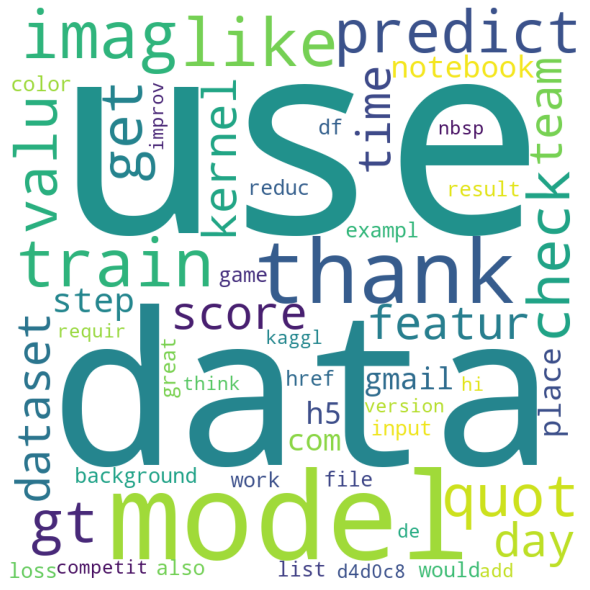

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words_set,
                min_font_size = 10).generate(" ".join(topic_words))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


Now let's devide our data into chunks of each year, and create a wordcloud foe each one to see how the topics changes!

In [13]:
forum_messages_sf["year"] = forum_messages_sf["PostDate"].apply(lambda x: x.split(" ")[0].split("/")[2])
years = forum_messages_sf["year"].unique()
years.sort()

dtype: str
Rows: 13
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [ ]:
year_topics_dict = {}

for year in years:
  sf_year = forum_messages_sf[forum_messages_sf["year"]==year]
  docs = create_docs(sf_year)
  topic_model = tc.topic_model.create(docs, num_topics=100)
  topics_sf = topic_model.topics
  topic_words = get_topic_best_word(topics_sf[:100])
  if topic_words:
    year_topics_dict[year] = topic_words
year_topics_dict

In [ ]:
import imageio
from wordcloud import WordCloud
import numpy as np

def plot_word_cloud(year, topic_words):
    # Data for plotting
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words_set,
                min_font_size = 10).generate(" ".join(topic_words))


    fig, ax = plt.subplots(figsize=(8,8), facecolor = None)
    ax.imshow(wordcloud)
    ax.axis("off")
    # ax.tight_layout(pad = 0)
    ax.set(title=f'Topics - {year}')

    # IMPORTANT ANIMATION CODE HERE

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

imageio.mimsave('./w_clouds.gif', [plot_word_cloud(year, year_topics_dict[year]) for year in years.sort()], fps=0.5)

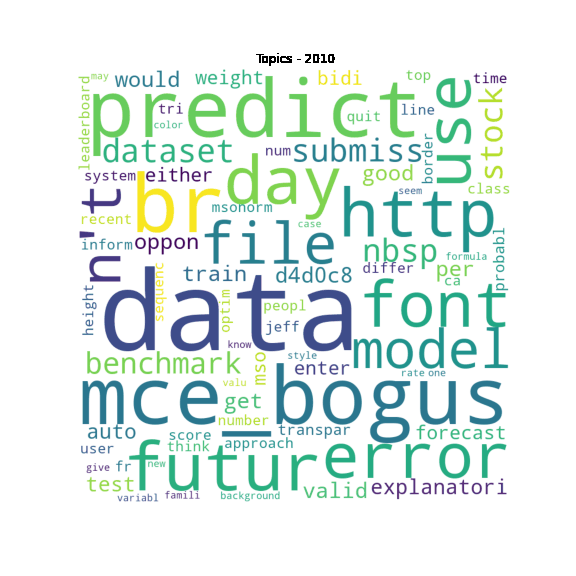

For best visuality, I choose to show only 100 topics for each year.

###Find which code packages and programming languages were mentioned most each year

To identify packages, I used spacy's rule based matcher. I defined a pattern- "import PACKAGE", and iterated with it over the text to find matching patterns.

To identify programming languages' names, I built a bag of words of the text, and using wikipedia's list of programming languages' names I extraxted the relevant words. I took the data from [here](https://gist.github.com/turicas/d5f8ce3ceb99f43a11b1e4e7fb2a2bf9#file-programming-languages-csv)

I performed the above operations for each year and displayed the results using plotly-express animated bar plot. 

**If I was Rothschild- 🧐** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

Again, I was using only a small portion of the data. If I could I would use it all to have more accurate results. 

If I had the resources (tagged dataset containing examples of packages and non-packages names, and examples of programming languages names and non programming languages names) I would train a spacy's custom model and use its NER detector. In that way, I might find packages that are not part of the (very) specific pattern I defined, or languages names that were not mentioned in the dataset. 

load list of programming languages

In [ ]:
languages_csv = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/programming-languages.csv"
sf_languages = tc.SFrame.read_csv(languages_csv)
sf_languages["name"] = sf_languages["name"].apply(lambda l: l.lower())
languages = list(sf_languages["name"])

import spacy and define a rule-based matcher

In [6]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher

nlp = spacy.load('en')
text =  "\n".join(forum_messages_sf["Message"])

In [7]:
matcher = Matcher(nlp.vocab)

pattern = [
        {"TEXT": {"REGEX": "import$"}}, 
        {"IS_ALPHA": True}
        ]
matcher.add("PACKAGE", [pattern])

def get_packages_from_text(text):
  doc = nlp(text)
  matches = matcher(doc)
  packages = []
  for match_id, start, end in matches:
      span = doc[start:end]  # The matched span
      packages.append(span.text.split(" ")[1])
  return packages

In [ ]:
from operator import itemgetter
import textwrap
import tqdm

df_lan = pd.DataFrame()
list_packages_years = {}

for year in years:
  sf_year = forum_messages_sf[forum_messages_sf["year"]==year]
  # get packages
  text = "\n".join(sf_year["Message"])
  text_chunks = textwrap.wrap(text,100000)
  packages = Counter()
  for txt in tqdm.tqdm(text_chunks):
    packages.update(get_packages_from_text(txt))
  print(packages)
  list_packages_years[year] = packages

  # get languages
  bow = text_to_bow(text)
  used_languages = list(set(languages).intersection(set(bow.keys())))
  values = [bow[lan] if lan in used_languages else 0 for lan in languages]
  df_lan = pd.concat([df_lan, pd.DataFrame({"Language":languages, "values":values, "year":year})])


display which packages were mentioned each year

In [106]:
packages_names = []
for year in years:
  packages_names.extend(list(list_packages_years[year].keys()))
packages_names = list(set(packages_names))

df_packages = pd.DataFrame()
for year in years:
    values = [list_packages_years[year][pack] if pack in list_packages_years[year] else 0 for pack in packages_names]
    df_packages = pd.concat([df_packages, pd.DataFrame({"Package":packages_names, "values":values, "year":year})])

df_packages = df_packages.sort_values("year")

fig = px.bar(df_packages, x='Package', y="values", animation_frame="year")
fig.update_layout(yaxis_range=[0, 15])

display which programming languages were mentiones each year

In [86]:
import turicreate.aggregate as agg

sf = tc.SFrame(df)
sf_grouped_by_lan = sf.groupby("Language", {"count":agg.COUNT()})
sf_grouped_by_lan = sf_grouped_by_lan[sf_grouped_by_lan["count"]>0]
df = df[df["Language"].isin(list(sf_grouped_by_lan["Language"].unique()))]

In [88]:
import plotly_express as px

df = df.sort_values("year")
fig = px.bar(df, x='Language', y="values", animation_frame="year")
fig.update_layout(yaxis_range=[0, 100])


#Question #3

In this question, we  were asked to propose a method for finding remarkable performances of olympic athletes, and a way to detect surprising results of the olympic games. 
since I couldn't find the right data for the question in the Tokyo 2020 Olympic games, I took this dataset:
[Olympic Track & Field Results](https://www.kaggle.com/jayrav13/olympic-track-field-results)- that holds all results from the Olympic Track & Field Events, scraped from https://olympic.org/athletics.

After cleaning and preprocessing the data, I chose to clustering in order ti achive the question's requirements. Clustering enables us to find the gold, silver or bronze medal athletes, that should be spatialy closed to each other in the matching cluster-centers. It can also help us to identify extraordinary performance of an athlete- the sample of this athlete will be very far from the clusters centers.
the pipeline contains PCA for dimensionality reduction, ans k-means using PCA.

**If I was Rothschild- 🧐** 

**Detailed explanation of how I would solve the problem if I had unlimited resources**: 

I would buy a dataset that holds information about the competing athletes, describe their performance in training and information such as BMI, height, age... I would then use k-means to characterize their performanes and use the built model for anomaly detection. I can add a threshold value to detect anomalies (such an extreamly talented athlete), If the distance between a data point and its nearest centroid is greater than the threshold value, then it is an anomaly.

Load the data. This dataset is relatively small, and doesn't have enough features to represent the athlete. So dimensionality reduction is noe necessary here, but I want to stay consistent with my proposed method.

In [88]:
import turicreate as tc

results_csv = "/content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/results.csv"
sf_results = tc.SFrame.read_csv(results_csv)
sf_results = sf_results.dropna()

Finished parsing file /content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/results.csv

Parsing completed. Parsed 100 lines in 0.039638 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Colab_Notebooks/Big_Data_Analysis/datasets/results.csv

Parsing completed. Parsed 2364 lines in 0.020546 secs.

clean & preprocess the data

In [89]:
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace("p",""))
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace("P",""))
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace("h",""))
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace(":",""))
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace(".",""))
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace(" ",""))
sf_results["Result"] = sf_results["Result"].apply(lambda r: r.replace("-",""))
sf_results = sf_results[sf_results["Result"]!="None"]

sf_results["Result"] = sf_results["Result"].astype(int)
sf_results

Columns:
	Gender	str
	Event	str
	Location	str
	Year	int
	Medal	str
	Name	str
	Nationality	str
	Result	int
	X9	str

Rows: 2349

Data:
+--------+------------+-----------+------+-------+-----------------------+-------------+
| Gender |   Event    |  Location | Year | Medal |          Name         | Nationality |
+--------+------------+-----------+------+-------+-----------------------+-------------+
|   M    | 10000M Men |    Rio    | 2016 |   G   |     Mohamed FARAH     |     USA     |
|   M    | 10000M Men |    Rio    | 2016 |   S   | Paul Kipngetich TANUI |     KEN     |
|   M    | 10000M Men |    Rio    | 2016 |   B   |      Tamirat TOLA     |     ETH     |
|   M    | 10000M Men |  Beijing  | 2008 |   G   |    Kenenisa BEKELE    |     ETH     |
|   M    | 10000M Men |  Beijing  | 2008 |   S   |     Sileshi SIHINE    |     ETH     |
|   M    | 10000M Men |  Beijing  | 2008 |   B   |       Micah KOGO      |     KEN     |
|   M    | 10000M Men |   Sydney  | 2000 |   G   |   Haile GEBRSELASSIE  |     ETH     |
|   M    | 10000M Men |   Sydney  | 2000 |   S   |      Paul TERGAT      |     KEN     |
|   M    | 10000M Men |   Sydney  | 2000 |   B   |     Assefa MEZGEBU    |     ETH     |
|   M    | 10000M Men | Barcelona | 1992 |   G   |      Khalid SKAH      |     MAR     |
+--------+------------+-----------+------+-------+-----------------------+-------------+
+--------+----+
| Result | X9 |
+--------+----+
| 25052  |    |
| 27056  |    |
| 27063  |    |
| 27012  |    |
| 27028  |    |
| 27041  |    |
| 27182  |    |
| 27183  |    |
| 27197  |    |
| 27467  |    |
+--------+----+
[2349 rows x 9 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [91]:
from sklearn import preprocessing

sf_results["Nationality_cat"] = preprocessing.LabelEncoder().fit_transform(sf_results["Nationality"])
sf_results["Gender_cat"] = preprocessing.LabelEncoder().fit_transform(sf_results["Gender"])
sf_results["Location_cat"] = preprocessing.LabelEncoder().fit_transform(sf_results["Location"])
sf_results["Medal_cat"] = preprocessing.LabelEncoder().fit_transform(sf_results["Medal"])

the dataset holds several different categories that cannot be compared with each other. let's take, for example the 10000M Men heat. 

In [121]:
sf_to_split = sf_results[sf_results["Event"]=="10000M Men"]

In [135]:
sf_to_split = sf_to_split["Result", "Nationality_cat", "Location_cat", "Medal_cat"]

fit the data to PCA

Text(0, 0.5, 'PCA 2')

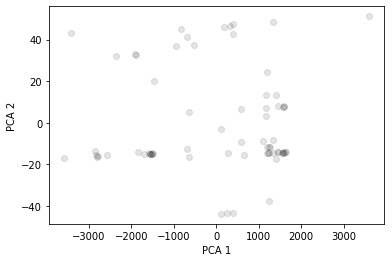

In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(sf_to_split.to_dataframe())
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [155]:
from math import sqrt

kmeans_model =  tc.kmeans.create(tc.SFrame(PCA_components), num_clusters=3)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 33        |

| 1             | 40        |

| 2             | 51        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

for general example, let's generate an extremly unique athlete and plot the data

In [203]:
import numpy as np

noise = np.random.normal(0,1,69)
noisy_sample = np.array(PCA_components[0]) * noise

(-100.0, 400.0)

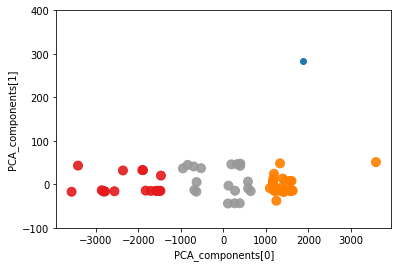

In [238]:
PCA_components['cluster_id'] = kmeans_model.cluster_id["cluster_id"]

plt.scatter(PCA_components[0], PCA_components[1], s=80, alpha=0.9, c=PCA_components['cluster_id'],
           cmap=plt.cm.Set1)
plt.scatter(noisy_sample[0], noisy_sample[1])
plt.xlabel("PCA_components[0]")
plt.ylabel("PCA_components[1]")
plt.ylim(-100,400)

we can see the three clusters, that represents the three different performances levels (according to gold, silver, bronze medals). The blue sample represents the unique athlete.

From an example we take from the orange cluster, we can see that the unique athlete is closest to the gold medal winners ('Medal_cat': 0 is gold)

In [219]:
pca_com = tc.SFrame(PCA_components)
pca_com

Columns:
	0	float
	1	float
	2	float
	3	float
	cluster_id	int

Rows: 69

Data:
+--------------------+---------------------+--------------------+
|         0          |          1          |         2          |
+--------------------+---------------------+--------------------+
| 3591.872864026377  |   51.2121543978625  | 3.477504403414717  |
| 1587.9215761409168 |  7.933560991520391  | 5.134800167104457  |
| 1580.946888779376  | -14.076470889749276 | 5.625046644279029  |
| 1631.9429935579997 | -14.256455411645726 | -5.393326111950608 |
| 1615.9430248582482 | -14.270998386420782 | -5.389069814458514 |
| 1602.9176480060946 |  7.701108296666572  | -5.864609495721628 |
| 1461.9487575330309 | -14.098806108940382 | 10.666993772177218 |
| 1460.9234310192664 |  7.898312433595038  | 10.181557279190503 |
|   1446.94874874    |  -14.11972753911483 | 10.674448088521727 |
| 1176.9107116508796 |  13.194012106268506 | -6.837234350801726 |
+--------------------+---------------------+--------------------+
+-----------------------+------------+
|           3           | cluster_id |
+-----------------------+------------+
|   0.2571068023845636  |     1      |
|  -0.9480926549357862  |     1      |
|   0.9681252830524731  |     1      |
| -0.011856749579754425 |     1      |
|  -1.0122426715084067  |     1      |
|   1.0710114603621188  |     1      |
|  -0.04332425852276567 |     1      |
|  -0.9597481653983228  |     1      |
|   0.9562971377686184  |     1      |
|  0.08501659553807686  |     1      |
+-----------------------+------------+
[69 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [226]:
sf_to_split[2]

{'Location_cat': 16, 'Medal_cat': 0, 'Nationality_cat': 30, 'Result': 27063}